# 機器學習 - 迴歸模型 (Regression Model) (1)
- 2022 機器學習 Summer Session 教材 (師培中心)<br>
@ 台南應用科技大學 資管系 杜主民 

## 回歸模型 (Regression Model)

## 一、簡單線性回歸 (Simple Linear Regression)
- 只有一個自變數和一個依變數的情形稱為簡單線性回歸。
- 這是最常見的模型，以斜率與截距的表達，可以很直接地看到特徵與目標之間的關係。
### $f(x) = w_0 + w_1x$
$w_0: 截距$ <br>
$w_1: 斜率$

### 做一個簡單線性回歸範例

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
np.random.seed(1)
x = np.random.randn(1, 20)*5 
x.sort()
y = x - np.random.normal(0, 2, 20)

[[ -9.30645513 -12.59015097  -7.30263778  -6.36983179  -6.19100399
   -2.43857879  -2.81300162  -0.76931989  -1.38449561  -2.67279695
    0.13646963  -0.06863398   1.58541413   3.28560676   4.25656833
    4.35236734   7.90346791   6.84170829   4.80212246   7.2399705 ]]


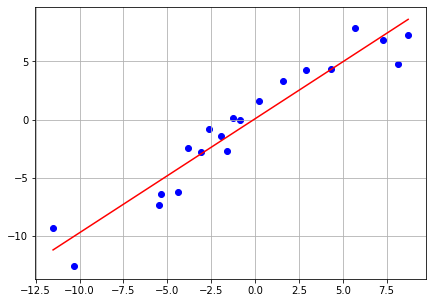

In [9]:
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize']=[7,5]
np.random.seed(1)
x = np.random.randn(1, 20)*5 
x.sort()
y = x - np.random.normal(0, 2, 20)

x = x.reshape(20,1) # 
y = y.ravel()

model = LinearRegression() # 建立 regression model 
model.fit(x, y) # 訓練 model 
y_pred = model.predict(x) # 預測

plt.scatter(x, y, c='b')
plt.plot(x, y_pred, c='r')
plt.grid(True)

In [6]:
model.intercept_

0.07667241939138036

In [7]:
# 印出 model 的截距與斜率
print(f'截距:{np.round(model.intercept_, 2)}')
print(f'斜率{np.round(model.coef_, 2)}')

截距:0.08
斜率[0.98]


<hr style='border-color:brown; border-width:3px'>

## 上述是使用 sklearn 套件及模組函數進行簡單線性迴歸，然迴歸的截距和斜率推導方法如下:

1. 假設有 n 個輸入$x_i$以及輸出$y_i$。
2. 定義一條最佳迴歸線 $y_i = w_0 + w_1x_i$，其中 $w_0$ 表示截距，$w_1$表示斜率。
3. **目標函數**/**損失函數**是每個觀察到的輸出$y_i$ 減去預測理想的輸出 $\hat y$ 的平方 
### $Loss(w_0, w_1) = (y_i - \hat y_i)^2$ <br>
4. 因為有許多的輸入和輸出，上述損失函數可以改寫為:
### $Loss(w_0, w_1) = \sum_{i}^{n}(y_i - \hat y_i)^2 = \sum_{i}^{n}(y_i - (w_0 + w_1x_i))^2$

5. 為了推估$w_0$，針對$Loss(w_0, w_1)$ 進行偏微分等於 0 
#### $$\frac{\partial Loss(w_0, w_1)}{\partial w_0}=\frac{\partial \sum_{i}^{n}(y_i - (w_0 + w_1x_i))^2}{\partial w_0}=0$$
#### $$\Rightarrow -2(\sum_{i}^{n}(y_i - w_0 + w_1x_i)=0$$
#### $$\Rightarrow \sum_i^n y_i - \sum_i^n w_0 - \sum_i^n w_1x_i = 0$$
#### $$\Rightarrow \sum_i^n y_i - n\cdot w_0 - \sum_i^n w_1x_i = 0$$
#### $$\Rightarrow n\cdot w_0 = \sum_i^n y_i - \sum_i^n w_1x_i$$
#### $$\Rightarrow w_0 = \frac{\sum_i^n y_i - \sum_i^n w_1x_i}{n}$$
### $$其中， \frac{\sum_{i}^{n}y_i}{n} = \bar y; \frac{\sum_{i}^{n}w_1x_i}{n} = w_1\bar x$$
### $$\Rightarrow \boxed{w_0 = \bar y - w_1\bar x}$$

6. 為了推估$w_1$，針對$LossLoss(w_0, w_1)$ 進行偏微分等於 0 
#### $$\frac{\partial Loss(w_0, w_1)}{\partial w_1}=\frac{\partial \sum_{i}^{n}(y_i - (w_0 + w_1x_i))^2}{\partial w_1}=0$$
#### $$\Rightarrow 2\sum_{i}^{n}y_i - (w_0 + w_1x_i)\cdot (-\frac{\partial(\sum_{i}^{n}(w_0 + w_1x_i)}{\partial w_1}) = 0$$
#### $$\Rightarrow -2\sum_{i}^{n}x_i(y_i - (w_0 + w_1x_i)) = 0$$
#### $$\Rightarrow -2\sum_{i}^{n}x_i(y_i - w_0 - w_1x_i) = 0$$
#### $$\Rightarrow \sum_{i}^{n}x_iy_i - w_0x_i - w_1x_i^2 = 0$$
#### $$\because \hspace{0.5cm} \Rightarrow \boxed{w_0 = \bar y - w_1\bar x}$$
#### $$\therefore \hspace{0.5cm} \sum_{i}^{n}x_iy_i - x_i(\bar y - w_1\bar x) - w_1x_i^2 = 0$$
#### $$\Rightarrow \sum_{i}^{n}x_iy_i - x_i\bar y + w_1x_i\bar x - w_1x_i^2 = 0$$
#### $$\Rightarrow \sum_{i}^{n}x_iy_i - x_i\bar y = \sum_{i}^{n}w_1x_i^2 - w_1x_i\bar x$$

#### $$\Rightarrow \sum_{i}^{n}x_iy_i - x_i\bar y = w_1\sum_{i}^{n}x_i^2 - x_i\bar x$$
### $\Rightarrow \boxed{w_1 = \frac{\sum_{i}^{n}x_iy_i - x_i\bar y}{\sum_{i}^{n}x_i^2 - x_i\bar x}}$ 或者 $\boxed{w_1 = \frac{\sum_{i}^{n}(y_i-\bar y)(x_i-\bar x)}{\sum_{i}^{n}(x_i-\bar x)^2}}$

<hr style='border-color:brown; border-width:3px'>

### 範例一: 迴歸直線方程式

In [1]:
# 1) import 套件 模組 函數 & 設定繪圖大小
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 5)  # 設定畫圖區的大小

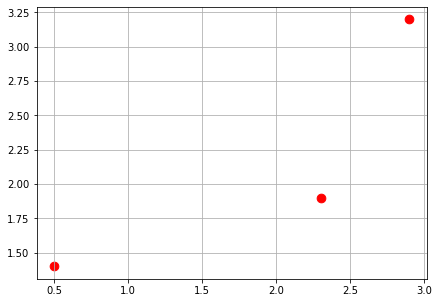

In [2]:
# 2) 設定資料
X = np.array([0.5, 2.3, 2.9])
Y = np.array([1.4, 1.9, 3.2])
plt.scatter(X,Y, c='r', s=75)
plt.grid(True)

### 直線方程式求解斜率和截距
### $f(x) = w_0 + w_1x$
### 斜率: $w_1 = \frac{\sum_{i}^{n}x_iy_i - x_i\bar y}{\sum_{i}^{n}x_i^2 - x_i\bar x}$

### 截距: $w_0 = \bar y - w_1\bar x$

### $$w_1 = \frac{\sum_{i}^{n}x_iy_i - x_i\bar y}{\sum_{i}^{n}x_i^2 - x_i\bar x} = \frac{14.35 - 12.35}{13.95-10.83} \approx 0.64$$
### $$w_0 = \bar y - w_1\bar x = 2.167 - 0.64\cdot 1.9 \approx 0.95$$

In [35]:
# 3)代入回歸直線方程式的斜率公式
X_mean = np.mean(X) # X 平均值
Y_mean = np.mean(Y) # Y 平均值
num = 0 # 分子 
den = 0 # 分母 

num = sum(X*Y - (X * Y_mean))    # 分子 
den = sum((X**2) - (X * X_mean)) # 分母

w1 = num / den          # 計算斜率 b
w0 = Y_mean - w1*X_mean # 計算截距 a
print(f'斜率 w1= {round(w1,2)}, 截距 w0= {round(w0,2)}')

斜率 w1= 0.64, 截距 w0= 0.95


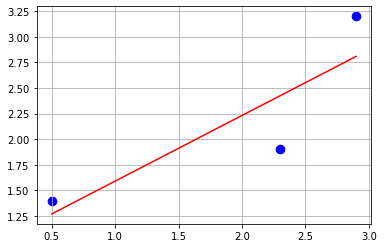

In [36]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.scatter(X,Y, s=75, c='b')
plt.plot(X, w0 + X*w1, 'r')   # r 是指定紅色線條
plt.grid(True)

### 範例二: 迴歸直線方程式
- 讀取 data.csv 資料，資料是 (100 x 2), 100 筆 2 個欄位。

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7.0, 5.0)

In [38]:
# 讀取資料
#data = pd.read_csv('./data/data.csv', header=None)
data = pd.read_csv('https://bit.ly/3uwhN74', header=None)
data.columns= ['X', 'Y']  # 設定欄位名稱
data.head(3) # 顯示前 3 筆資料

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382


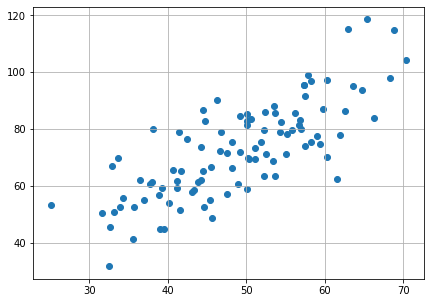

In [39]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

plt.scatter(X, Y)
plt.grid(True)

In [40]:
# 3)代入回歸直線方程式的斜率公式
X_mean = np.mean(X) # X 平均值
Y_mean = np.mean(Y) # Y 平均值

num = 0 # 分子 
den = 0 # 分母 

num = sum(X*Y - (X * Y_mean))    # 分子 
den = sum((X**2) - (X * X_mean)) # 分母

w1 = num / den          # 計算斜率 b
w0 = Y_mean - w1*X_mean # 計算截距 a
print(f'斜率 w1= {round(w1,2)}, 截距 w0= {round(w0,2)}')

斜率 w1= 1.32, 截距 w0= 7.99


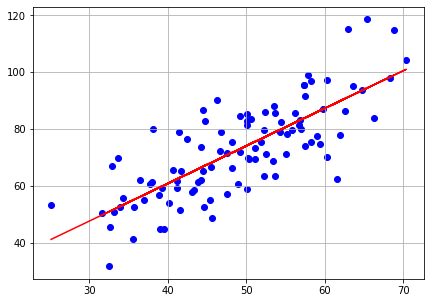

In [41]:
plt.scatter(X,Y,c='b')
plt.plot(X, w0 + w1*X, 'r')
plt.grid(True)
plt.savefig('./images/linearRegression2.png')

### 經由公式計算出斜率和截距，當遇到新的資料 x，便可以**預測** y 的值。 

### 範例三: 代入 sklearn 

In [32]:
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize']=[7,5]

In [98]:
data = pd.read_csv('https://bit.ly/3uwhN74', header=None)
data.columns= ['X', 'Y']
data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [100]:
data.iloc[:, 1].head()

0    31.707006
1    68.777596
2    62.562382
3    71.546632
4    87.230925
Name: Y, dtype: float64

In [118]:
data = pd.read_csv('https://bit.ly/3uwhN74', header=None)
data.columns= ['X', 'Y']
X = data['X']
X.head(5)
XX = data[['X']]
print(X.ndim)
print(XX.ndim)

1
2


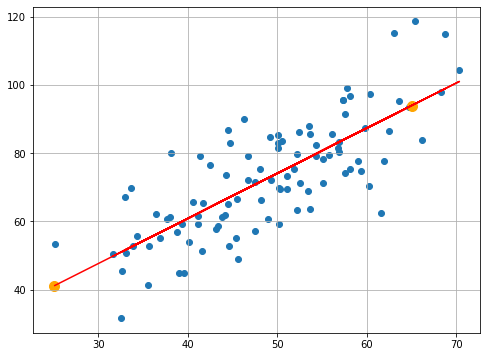

In [43]:
# 2) 讀取外部資料
plt.rcParams['figure.figsize']=(8,6)
#data = pd.read_csv('./data/data.csv', header=None)
data = pd.read_csv('https://bit.ly/3uwhN74', header=None)
data.columns= ['X', 'Y']

# 3) 選取 feature X 資料與 response Y 資料
#X = data.iloc[:, 0]
#y = data.iloc[:, 1]

# 4) X 是一維的 Series，必須轉換為 2 維矩陣型態
#X = np.array(X).reshape(len(X),1)

XX = data['X']

#X = data[['X']] # data.X
#Y = data['Y']   # data.Y

# 產生 regression 物件
reg = LinearRegression() 

# 訓練 regression 物件
reg.fit(X,Y)
plt.scatter(X, Y)
plt.scatter(65, 93.95, s=100, c='orange') # 驗證的點
plt.scatter(25, 41.05, s=100, c='orange') # 驗證的點
plt.plot(X, reg.intercept_ + reg.coef_ * X , 'r')
plt.grid(True)

In [36]:
print(f'截距 w0= {reg.intercept_}')
print(f'斜率 w1= {reg.coef_}')

截距 w0= 19.453756416068835
斜率 w1= [-0.37653327]


### 測試

In [42]:
y_pred = reg.predict([[25]])  # X 必須是 2 維型態
print(y_pred)

[41.05179655]


In [81]:
w0 = reg.intercept_  # intercept
w1 = reg.coef_       # slope

In [95]:
y_pred = w0 + w1*X

In [96]:
print(type(y_pred), y_pred.ndim)
#y_pred.iloc[:, 0]
y_pred = y_pred.iloc[:,0]
print(type(y_pred), y_pred.ndim)

<class 'pandas.core.frame.DataFrame'> 2
<class 'pandas.core.series.Series'> 1


In [92]:
y_pred = y_pred.iloc[:,0]
print(np.mean(abs(Y - y_pred)))          # MAE
print(np.mean((Y - y_predred)**2))          # MSE
print(np.sqrt(np.mean((Y - y_pred)**2))) # RMSE

8.301392283738961
110.25738346621318
10.500351587742822


<hr style='border-color:brown; border-width:3px'>

## 模型評估指標
- 當給予一個自變數 $x$ 值，透過迴歸線可得知預測值 $\bar y$。
- 因為迴歸是預測一個連續值，希望預測的值跟實際上值越接近越好。所以，彙整計算資料集所有的預測值與實際值之差距，便是針對模型的成效評估。
- 而迴歸問題有三種常用的評估指標，分別是:
    - 平均絕對值誤差 (Mean Absoute Error, **MAE**)
    - 均方誤差 (Mean Squared Error, **MSE**)
    - 均方根誤差 (Root Mean Squared Error, **RMSE**)
- 另有一種也常見的評估指標 $R^2$，稱為**決定係數 (Coefficient of Determination)**。

### 平均絕對值誤差 (Mean Absoute Error, MAE)
### $$\frac{1}{n}\sum_{i=1}^{n}|y_i - \hat y|$$

### 範例

In [17]:
import numpy as np
from sklearn import metrics
orig = np.array([100, 50, 30, 20])
pred = np.array([90, 50, 50, 30])

# 自行計算 MAE
print(f'自行計算 MAE= {np.mean(abs(orig - pred))}')

# 使用 scikit-learn metrics 計算 MAE
print(f'使用sklearn metrics 計算 MAE= {metrics.mean_absolute_error(orig, pred)}')

自行計算 MAE= 10.0
使用sklearn metrics 計算 MAE= 10.0


### 均方誤差 (Mean Squared Error, MSE)
### $$\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat y)^2$$

### 範例

In [28]:
orig = np.array([100, 50, 30, 20])
pred = np.array([90, 50, 50, 30])
print((orig - pred)**2)
print(np.sqrt(np.mean((orig - pred)**2)))

[100   0 400 100]
12.24744871391589


In [21]:
import numpy as np
from sklearn import metrics
orig = np.array([100, 50, 30, 20])
pred = np.array([90, 50, 50, 30])

# 自行計算 MSE
print(f'自行計算 MSE= {np.mean((orig - pred)**2)}')

# 使用 scikit-learn metrics 計算 MSE
print(f'使用sklearn metrics 計算 MSE= {metrics.mean_squared_error(orig, pred)}')

自行計算 MSE= 150.0
使用sklearn metrics 計算 MSE= 150.0


### 均方根誤差 (Root Mean Squared Error, RMSE)
### $$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat y)^2}$$

### 範例

In [3]:
import numpy as np
from sklearn import metrics
orig = np.array([100, 50, 30, 20])
pred = np.array([90, 50, 50, 30])

# 自行計算 RMSE
print(f'自行計算 RMSE= {np.sqrt(np.mean((orig - pred)**2))}')

# 使用 scikit-learn metrics 計算 RMSE
print(f'使用sklearn metrics計算RMSE= {np.sqrt(metrics.mean_squared_error(orig, pred))}')

自行計算 RMSE= 12.24744871391589
使用sklearn metrics計算RMSE= 12.24744871391589


### 決定係數(Coefficient of Determination) $R^2$
- 決定係數經常在統計學使用的，意謂著當兩個連續型變數 X 和 Y 執行迴歸分析之後，兩者在迴歸線的擬合 (fit) 程度。
- 決定係數和另一個常用的統計名詞**相關係數** (R, Correlation coefficient) 有關聯性。
- 相關係數可以看出兩變數 x 與 y 線性*關聯性的高低程度*。
- 但若要得知兩者在迴歸線的*擬合程度*，則必須參考決定係數。
- 我們經常以SSR (迴歸變異), SSE (隨機變異), 以及 SST (總變異) 來說明決定係數$R^2$。<p><br>
SSE = ${\sum(y_i - \hat y)^2}$ (Sum of Square Error) <p/>
SSR = ${\sum(\hat y - \bar y)^2}$ (Sum of Square Regression) <p/>
SST = ${\sum(y_i - \bar y)^2}$ (Total Sum of Squares) <p/>
- 決定係 數比較通俗的解釋是: 在這條迴歸線上，因變數 $y$ 有多少的程度比例能被自變數 $x$ 解釋。
- $R^2$的值介於 0 到 1之間。最的大值 1，表示迴歸模式 $x$ 變數能夠解釋全體 $y$ 的變異；$R^2$ 若是 0 則表示 $x$ 和 $y$ 毫無關係存在。
- 在學術研究上，$R^2$ 值為 0.5 或 0.6 比較常見，$R^2$ 值大於 0.7 的情況比較少見。

### 1. 使用 sklearn metrics 的 re_score() 計算決定係數 $R^2$

In [104]:
import numpy as np
from sklearn import metrics
orig = np.array([100, 50, 30, 20])
pred = np.array([100, 50, 30, 10])

# 使用 sklearn metrics 的 r2_score 計算決定係數 R^2
from sklearn.metrics import r2_score
r2_squared = r2_score(orig, pred)
print(f'使用sklearn metrics r2_score 計算R^2= {r2_squared}')

使用sklearn metrics r2_score 計算R^2= 0.9736842105263158


In [105]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#data = pd.read_csv('./data/data.csv', header=None)
data = pd.read_csv('https://bit.ly/3uwhN74', header=None)
data.columns= ['X', 'y']
X = data.X
y = data.y

X = np.array(X).reshape(len(X),1) # 轉換為 2 維矩陣型態
reg = LinearRegression()          # 建立 regression 物件
reg.fit(X, y)                     # 訓練 regression 物件
pred_y = reg.predict(X)
r2_squared = r2_score(y, pred_y)
print(f'使用sklearn metrics r2_score 計算R^2= {r2_squared}')

使用sklearn metrics r2_score 計算R^2= 0.5986557915386619


### 2. 使用 sklearn 建立回歸模型的 score() 計算決定係數 $R^2$

In [106]:
import numpy as np
from sklearn.linear_model import LinearRegression

#data = pd.read_csv('./data/data.csv', header=None)
data = pd.read_csv('https://bit.ly/3uwhN74', header=None)
data.columns= ['X', 'y']
X = data.X
y = data.y

X = np.array(X).reshape(len(X),1) # 轉換為 2 維矩陣型態
reg = LinearRegression()          # 建立 regression 物件
reg.fit(X, y)                     # 訓練 regression 物件

r2_squared = reg.score(X,y)        # R^2
print('r2_squared: ', r2_squared)

r2_squared:  0.5986557915386619


### 3. 自行計算決定係數 $R^2$

#### $SSE = {\sum(y_i - \hat y)^2}$ (Sum of Square Error)
#### $SSR = {\sum(\hat y - \bar y)^2}$ (Sum of Square Regression)
#### $SST = {\sum(y_i - \bar y)^2}$ (Total Sum of Squares)
### $R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$

In [107]:
#data = pd.read_csv('./data/data.csv', header=None)
data = pd.read_csv('https://bit.ly/3uwhN74', header=None)
data.columns= ['X', 'y']
X = data.X
y = data.y
w0= 7.99102  # 已計算出的 w0(截距)
w1= 1.32243  # 已計算出的 w1(斜率)
Y_mean = np.mean(y)  # y 平均值

In [113]:
# 計算 SSE
Y_hat = w0 + w1*X  # 通過迴歸線上的理想 Y 值
SSE = np.sum((Y - Y_hat)**2)

# 計算 SST
SST = np.sum((Y - Y_mean)**2) 

# 計算 R^2
R2 = 1 - (SSE/SST)

print(f'自行計算決定係數𝑅2= {R2}')

自行計算決定係數𝑅2= 0.5986557915288158


<hr style='border-color:brown; border-width:3px'>

## 梯度下降求截距和斜率 (暫略!)

<hr style='border-color:brown; border-width:3px'>

## 分隔訓練資料和測試資料
- 資料集的資料卻不會全部拿來做訓練，通常擷取 60% - 80% 的資料當成訓練資料 (Training Data)，用以訓練模型，其餘的資料保留為測試資料(Testing Data)。
- 當使用訓練資料完成模型訓練後，再以測試資料評估的模型表現。
- 注意，用來訓練的資料必須是 2 維矩陣型態。

In [16]:
# 1) import 套件模組函數 & 設定繪圖大小
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # sklearn套件的model_selection模組的train_test_split 函數

In [17]:
# 2) 讀取資料或產生資料
#data = pd.read_csv('./data/data.csv', header=None)
data = pd.read_csv('https://bit.ly/3uwhN74', header=None)
data.columns= ['X', 'y']

In [18]:
data.head(3)

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382


In [19]:
# 3) 選取 feature X 資料與 target(response/label) y 資料
X = data.iloc[:, 0]
y = data.iloc[:, 1]

In [36]:
# 4) 分隔訓練資料和測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
# pd.options.mode.chained_assignment = None  # default='warn' 不要顯示警示說明

In [38]:
#X_train = X_train[:,np.newaxis]
#X_test= X_test[:,np.newaxis]
X_train = np.array(X_train).reshape(len(X_train),1)
X_test = np.array(X_test).reshape(len(X_test),1)
print(X_train.shape, X_test.shape, X_train.ndim, X_test.ndim)

(70, 1) (30, 1) 2 2


In [39]:
# 5) 訓練模型
model = LinearRegression()  #建立 regression 模型

model.fit(X_train, y_train) # 訓練 regression 物件

LinearRegression()

In [40]:
# 6) predict the test set results
w0 = model.intercept_
w1 = model.coef_
print('截距 w0= {}, 斜率 w1= {}'.format(w0, w1))

y_pred = model.predict(X_test)

截距 w0= 4.902019316324953, 斜率 w1= [1.37800146]


In [41]:
# 7) evaluate the model
r_squared = model.score(X_train, y_train) # 訓練資料的決定係數 R^2
print(f'model.score(X_train, y_train)={r_squared}')

r_squared = model.score(X_test, y_test) # 測試資料的決定係數 R^2
print(f'model.score(X_test, y_test)={r_squared}')

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)  # 另一個方法計算決定係數 R^2 
print(f'r2_score(y_test, y_pred)={r_squared}')

model.score(X_train, y_train)=0.638860686598496
model.score(X_test, y_test)=0.4769365552229239
r2_score(y_test, y_pred)=0.4769365552229239


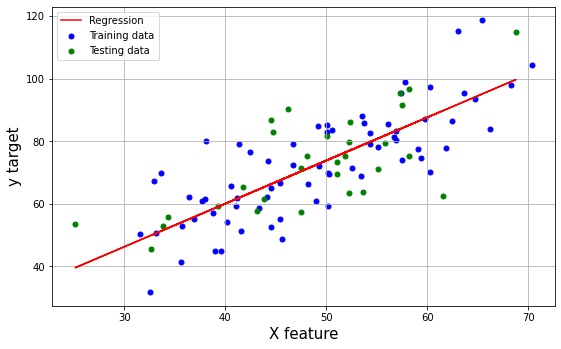

In [42]:
# 8) plot the results
plt.rcParams['figure.figsize']=[9,5.5]
plt.scatter(X_train, y_train, c='b', s=25, label='Training data')
plt.scatter(X_test, y_test, c='g', s=25, label='Testing data')
plt.plot(X_test, y_pred, c='r', label='Regression')
plt.xlabel('X feature', fontsize=15)
plt.ylabel('y target', fontsize=15)
plt.legend()
plt.grid(True)

In [56]:
# 9) predict values
# 如果 X 的輸入是 [12.34]，那麼根據迴歸模型，y 的輸出應該是多少?
x_input = np.array([[12.34]])
print(model.predict(x_input))

# 如果 X 的輸入是 x_input =[33, 55, 77]，那麼根據迴歸模型，y 的輸出應該是多少?
x_input = np.array([[33,55,77]]).T
model.predict(x_input)

[22.52307864]


array([ 51.25126578,  81.84275257, 112.43423936])

<hr style='border-color:brown; border-width:3px'>

## 練習題一
- 1.請讀取 `homeprices.csv`檔案 (網址: https://bit.ly/3PcOCOe) ，並顯示出資料
- 2.此資料集有 3 個欄位，分別是 `town`, `area`, `price`，為了執行簡單現行迴歸，請只取用 `area` 當成 X (feature), price 當成 y (target)，畫出資料的散布圖。
- 3.請以投影片`2_迴歸模型`第10 - 13頁推導的公式，自行計算此資料集的截距 $w_0$ 和斜率 $w_1$。
- 4.請以 sklearn 套件模組，計算計算此資料集的截距 $w_0$ 和斜率 $w_1$。
- 5.請再畫出迴歸線。
- 6.請計算 MAE, MSE, RMSE 以及 $R^2$

## 提示: 使用 sklearn 求解迴歸步驟
1. import library
2. import dataset
3. define X and y
4. train the model
5. evaluate the model
6. plot the results
7. predict the target values

In [ ]:
# Solution 1-1

In [ ]:
# Solution 1-2

In [ ]:
# Solution 1-3

In [ ]:
# Solution 1-4

In [10]:
# Solution 1-5

In [ ]:
# Solution 1-6

<hr style='border-color:brown; border-width:3px'>

## 練習題二
1. 請使用 sklearn.datasets 的 make_regression 函數產生 1000 筆 1 個 feature 的資料集。資料集的唯一欄位 X 是 feature，target 名稱是 y。 
2. 請將資料集分成 70% 訓練資料和 30% 測試資料。
3. 請以散布圖的不同顏色表示訓練資料和測試資料。
4. 請以 sklearn 套件模組進行迴歸訓練，並顯示此資料集的截距 $w_0$ 和斜率 $w_1$。
5. 請再畫出迴歸線。
6. 請計算 MAE, MSE, RMSE 以及$R^2$。

## 提示: 使用 sklearn，分成訓練和測試資料的求解迴歸步驟
1. import library
2. imort dataset
3. define X and y
4. split the dataset in training set and test set
5. train the model on the training set
6. predict the test set results
7. evalute the model
8. plot the results
9. predicte values

In [ ]:
# Solution 2-1
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=20) # 產生 100 筆 1 個 feature 的資料集

In [ ]:
# Solution 2-2

In [ ]:
# Solution 2-3

In [ ]:
# Solution 2-4

In [ ]:
# Solution 2-5

In [ ]:
# Solution 2-6

<hr style='border-color:brown; border-width:3px'>

## 練習題三
- 使用 sklearn 的 Boston House 資料集。
- 請載入 `from sklearn.datasets import load_boston`，再執行 `load_boston()`函數，建立資料集物件變數, e.g., `boston_dataset=load_boston()`.
- boston_dataset 物件有幾個屬性:
    - data: 特徵值資料
    - DESCR: 描述性敘述
    - feature_names: 欄位名稱
    - target: 目標值
- 請將 data 當成 features 欄位；將 target 屬性當成目標。

- CRIM :每個城鎮的人均犯罪率 (per capita crime rate by town)
- ZN : 佔地25,000平方英尺以上的住宅區域比例(proportion of residential land zoned for lots over 25,000 sq.ft.)
- INDUS : 每個城鎮非零售業的營業面積比例(proportion of non-retail business acres per town)
- CHAS : 是否靠近河邊(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))
- NOX : 一氧化氮濃度（ppm)(nitric oxides concentration (parts per 10 million))
- RM : 每個住宅的平均房間數(average number of rooms per dwelling)
- AGE : 1940年前私有住宅的住房比率(proportion of owner-occupied units built prior to 1940)
- DIS : 與五個波士頓就業中心的加權距離(weighted distances to five Boston employment centres)
- RAD : 徑向公路的通達指數(index of accessibility to radial highways)
- TAX : 每10,000美元的所需繳的財產稅(full-value property-tax rate per 10,000)
- PTRATIO : 每個城鎮的師生比例(pupil-teacher ratio by town)
- B : 黑人比例(值為$1000(Bk-0.63)^2$ where Bk is the proportion of blacks by town)
- LSTAT : 中下階級的比率(% lower status of the population)

### 題目
1. 請分割訓練和測試資料後執行 Linear Regression，檢驗訓練資料和測試資料的 $r^2$。
2. 依據資料集的 feature_names 欄位名稱，只取 CRIM 此欄位小於等於 1.5 的資料當成 training data，其餘的資料(CRIM 大於 1.5)當成 testing data，檢驗訓練資料和測試資料的 $r^2$。
3. 請將 `RM`, `TAX`, `LSTAT` 欄位當 features，MEDV 是 target，將資料分成 60% traiing data, 40% testing data，請計算Linear Regression 的 $r^2$

In [11]:
# Solution 3-1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [14]:
sk_boston = load_boston()

In [15]:
sk_boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X = sk_boston.data
y = sk_boston.target
print(X.shape, y.shape)

(506, 13) (506,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X_test)

In [7]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7043800862313001
0.8146361027201625


In [8]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8146361027201625


In [72]:
# Solution 3-2
## 先將 features 資料轉換成 pd.DataFrame
boston = pd.DataFrame(data=sk_boston.data, columns=sk_boston.feature_names)
# 新增 target 欄位名稱 MEDV
boston['MEDV'] = sk_boston.target
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [73]:
pd.options.mode.chained_assignment = None  # default='warn' 不要顯示警示說明

In [77]:
X_train = boston[boston.CRIM <= 1.5]
X_train.drop(columns='MEDV', inplace=True, axis=1)
X_test = boston[boston.CRIM > 1.5]
X_test.drop(columns='MEDV', inplace=True, axis=1)

y_train = boston[boston.CRIM <= 1.5]['MEDV']
y_test = boston[boston.CRIM > 1.5]['MEDV']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 13) (350,)
(156, 13) (156,)


In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [79]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8653490350173698
-5.851827999527522


In [80]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

-5.851827999527522


### 如果帶入 Ridge Regression 呢

In [76]:
from sklearn.linear_model import Ridge

In [85]:
rdg = Ridge(alpha=100)
rdg.fit(X_train, y_train)
rdg.score(X_train, y_train), rdg.score(X_test, y_test)

(0.7801403387296064, 0.2411601674397441)